# Load The Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import preprocessing

FILENAME = "train.csv"
df = pd.read_csv(FILENAME)
df.columns

C:\Users\User\AppData\Local\Temp\ipykernel_16616\1695631969.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Index(['Year', 'S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9',
       'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19',
       'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29',
       'S30', 'S31', 'S32', 'S33', 'S34', 'S35', 'S36', 'S37', 'S38', 'S39',
       'S40', 'S41', 'S42', 'S43', 'S44', 'S45', 'S46', 'S47', 'S48', 'S49',
       'S50', 'S51', 'S52', 'S53', 'S54', 'S55', 'S56', 'S57', 'S58', 'S59',
       'S60', 'S61', 'S62', 'S63', 'S64', 'S65', 'S66', 'S67', 'S68', 'S69',
       'S70', 'S71', 'S72', 'S73', 'S74', 'S75', 'S76', 'S77', 'S78', 'S79',
       'S80', 'S81', 'S82', 'S83', 'S84', 'S85', 'S86', 'S87', 'S88', 'S89'],
      dtype='object')

# Split The Dataset

In [2]:
X = df.iloc[:, 1:]
y = df[["Year"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)
print(X_test.columns)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=49)

Index(['S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10',
       'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20',
       'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29', 'S30',
       'S31', 'S32', 'S33', 'S34', 'S35', 'S36', 'S37', 'S38', 'S39', 'S40',
       'S41', 'S42', 'S43', 'S44', 'S45', 'S46', 'S47', 'S48', 'S49', 'S50',
       'S51', 'S52', 'S53', 'S54', 'S55', 'S56', 'S57', 'S58', 'S59', 'S60',
       'S61', 'S62', 'S63', 'S64', 'S65', 'S66', 'S67', 'S68', 'S69', 'S70',
       'S71', 'S72', 'S73', 'S74', 'S75', 'S76', 'S77', 'S78', 'S79', 'S80',
       'S81', 'S82', 'S83', 'S84', 'S85', 'S86', 'S87', 'S88', 'S89'],
      dtype='object')


# Show Data Distribution

In [3]:
import matplotlib.pyplot as plt

def histogram(column_name):
    data = X_train[column_name]
    plt.hist(data)
    plt.show()

def all_histograms(df):
    for col in df.columns:
        plt.figure(figsize=(8, 6))
        plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Istogramma della colonna {col}')
        plt.xlabel('Valore')
        plt.ylabel('Frequenza')
        plt.grid(True)
        plt.show()

def boxplot_y():
    data = y_train["Year"]
    plt.boxplot(data, whis=1.5)
    plt.show()

def density_plots(df):
    for col in df.columns:
        plt.figure(figsize=(8, 6))
        sns.displot(df[col], kind="kde", fill=True)
        plt.title(f'Densità di probabilità della colonna {col}')
        plt.xlabel('Valore')
        plt.ylabel('Densità')
        plt.grid(True)
        plt.show()

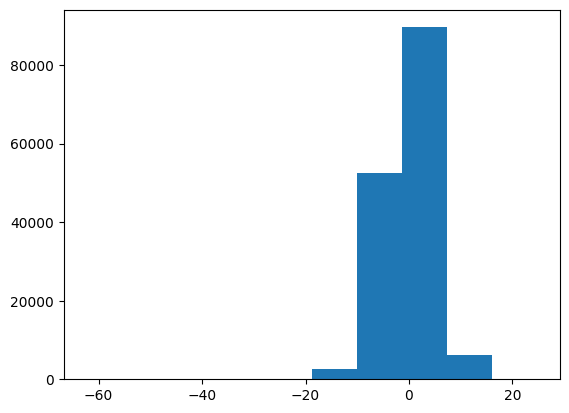

In [4]:
histogram("S10") #Essendo un problema di regressione non direi che il seguente dataset risulta sbilanciato


In [5]:
#boxplot_y()

In [6]:
#all_histograms(X_train)

In [7]:
#density_plots(X_train)


# Pre-processing

In [8]:
#pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)

In [9]:
#Normalization
def plot_norm(x, x_normalized):
    plt.subplot(2, 1, 1)
    plt.plot(x)
    plt.subplot(2, 1, 2)
    plt.plot(x_normalized)
    plt.show()

def norm(df, column_name, order):
    x = df[column_name]
    x_norm1 = np.linalg.norm(x, ord=order)
    x_normalized = x / x_norm1
    df[column_name] = x_normalized
    #plot_norm(x, x_normalized)
    if order == 1:
        print(sum(x_normalized))
    if order == 2:
        print(sum(x_normalized**2))
    if order == np.inf:
        print(max(x_normalized))

X_train_norm1 = X_train.copy()
X_train_norm2 = X_train.copy()
X_train_normInf = X_train.copy()

In [10]:
#MinMax Scaling
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(X_train)
X_train_minmax = min_max_scaler.transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

In [11]:
#Standardization
scaler = preprocessing.StandardScaler()
#Addestramento
scaler.fit(X_train)
#Applicazione
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

PCA

In [21]:
from sklearn.decomposition import PCA

pca = PCA()
principals_components = pca.fit_transform(X_train_scaled)

loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)], index=X_train.columns)
print(loadings)

          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
S0  -0.158264 -0.199249  0.042420  0.003845  0.030195 -0.069747 -0.062343   
S1  -0.060486 -0.205318  0.041608 -0.063648  0.149725 -0.007570 -0.027172   
S2  -0.084909  0.046220  0.165580 -0.082910 -0.009048 -0.155015 -0.228194   
S3   0.097862 -0.129307 -0.180529 -0.157563  0.051323 -0.147976 -0.036607   
S4   0.088771  0.068812 -0.044914  0.017826  0.133202  0.095942 -0.030355   
..        ...       ...       ...       ...       ...       ...       ...   
S85  0.048564 -0.044518  0.004543  0.097920 -0.014563 -0.036001 -0.012931   
S86 -0.008654  0.007972 -0.011753 -0.041592 -0.042130 -0.101043 -0.116931   
S87  0.073481 -0.009060 -0.052894 -0.110534 -0.097487 -0.135253  0.037599   
S88  0.021496  0.051113 -0.086320 -0.035641 -0.064645  0.024863  0.060581   
S89  0.034225  0.092971 -0.002633 -0.065650 -0.114324 -0.038773 -0.074133   

          PC8       PC9      PC10  ...      PC81      PC82      PC83  \
S0 

In [30]:
# Set a threshold for which features to extract
threshold = 0.3

# Find features with loadings above the threshold for each principal component
important_features = {}
for column in loadings.columns:
    important_features[column] = loadings.index[loadings[column].abs() > threshold].tolist()

# Now 'important_features' dictionary contains the important features for each PC
for pc, features in important_features.items():
    print(f"{pc}: {', '.join(features)}")

PC1: 
PC2: 
PC3: 
PC4: S64
PC5: 
PC6: 
PC7: S27
PC8: 
PC9: 
PC10: 
PC11: S84
PC12: 
PC13: S53
PC14: 
PC15: 
PC16: S11
PC17: S85
PC18: 
PC19: S46
PC20: S49
PC21: S5, S67
PC22: 
PC23: S89
PC24: S8
PC25: S63
PC26: 
PC27: 
PC28: S54
PC29: 
PC30: S61
PC31: 
PC32: S49
PC33: S43
PC34: 
PC35: S11
PC36: S4
PC37: S27
PC38: 
PC39: S88
PC40: S61
PC41: 
PC42: 
PC43: S4
PC44: 
PC45: S30
PC46: 
PC47: S38
PC48: 
PC49: S42
PC50: 
PC51: S31
PC52: S31, S64
PC53: S76
PC54: S29
PC55: 
PC56: 
PC57: S34, S68
PC58: S60
PC59: S42
PC60: S13
PC61: 
PC62: 
PC63: 
PC64: S30, S44, S50
PC65: 
PC66: 
PC67: S48
PC68: S53, S57
PC69: 
PC70: S48
PC71: S57, S58
PC72: S33
PC73: S16
PC74: S0
PC75: S41, S58
PC76: S13, S64
PC77: S7, S59
PC78: S18, S19
PC79: S59, S80
PC80: S23
PC81: S23, S78
PC82: S9
PC83: S15, S18
PC84: S20
PC85: S22, S26
PC86: S19, S20, S32
PC87: S19, S21
PC88: S15, S17, S22
PC89: S17, S22
PC90: S3, S5, S10


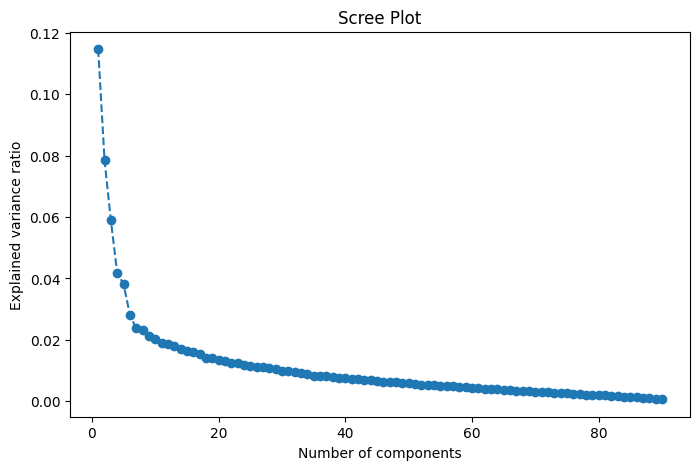

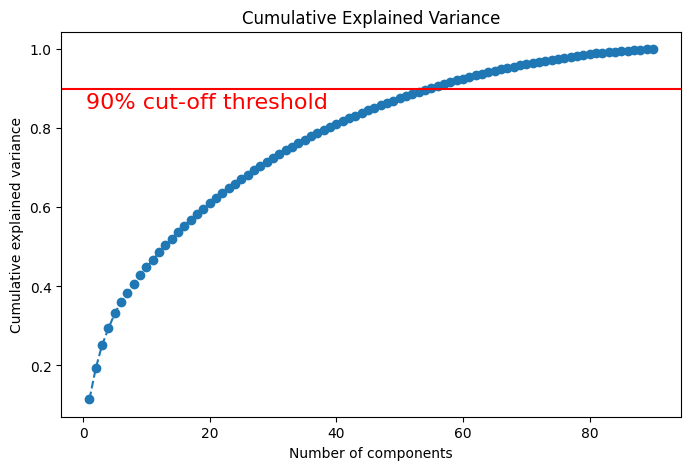

In [34]:
import numpy as np
# Create a scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Create a plot for cumulative explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y=0.9, color='r', linestyle='-')  # 90% variance line
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)
plt.show()

# Modeling

Linear-Regressor

In [12]:
#Linear-Regressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression().fit(X_train, y_train)

predizioni = reg.predict(X_test)

mse = mean_squared_error(y_test, predizioni)
print("Mean Squared Error (MSE):", mse)

r_squared = r2_score(y_test, predizioni)
print("Coefficienti di determinazione R²:", r_squared)

Mean Squared Error (MSE): 84.41033301254126
Coefficienti di determinazione R²: 0.23053951540571493


In [13]:
reg = LinearRegression().fit(X_train_scaled, y_train)

predizioni = reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, predizioni)
print("Mean Squared Error (MSE):", mse)

r_squared = r2_score(y_test, predizioni)
print("Coefficienti di determinazione R²:", r_squared)

Mean Squared Error (MSE): 84.41033301254129
Coefficienti di determinazione R²: 0.2305395154057146


In [14]:
reg = LinearRegression().fit(X_train_minmax, y_train)

predizioni = reg.predict(X_test_minmax)

mse = mean_squared_error(y_test, predizioni)
print("Mean Squared Error (MSE):", mse)

r_squared = r2_score(y_test, predizioni)
print("Coefficienti di determinazione R²:", r_squared)

Mean Squared Error (MSE): 84.41033301254127
Coefficienti di determinazione R²: 0.2305395154057147


Random-Forest-Regressor

In [15]:
# from sklearn.ensemble import RandomForestRegressor

# n_estimators_values = [10, 50, 100, 200, 300]
# mse_values = []

# for n_estimators in n_estimators_values:
#     modello_random_forest = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    
#     modello_random_forest.fit(X_train, y_train)
    
#     predizioni_val = modello_random_forest.predict(X_val)
    
#     mse_val = mean_squared_error(y_val, predizioni_val)
    
#     mse_values.append(mse_val)

# # Plot dei risultati
# plt.figure(figsize=(10, 6))
# plt.plot(n_estimators_values, mse_values, marker='o', linestyle='-')
# plt.title('MSE al variare del numero di alberi nel RandomForestRegressor')
# plt.xlabel('Numero di alberi')
# plt.ylabel('MSE')
# plt.grid(True)
# plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionW

SVM

KNN